In [4]:
import json
import rdflib
import networkx as nx

# Load RDF file
g = rdflib.Graph()
g.parse('bikg_app/rdf/omics_model.ttl', format='ttl')

# Create a NetworkX graph
nxg = nx.Graph()

# Add nodes and edges from RDF file
for subj, pred, obj in g:
    if isinstance(subj, rdflib.URIRef) and isinstance(obj, rdflib.URIRef):
        nxg.add_edge(subj.toPython(), obj.toPython())

# Calculate layout with NetworkX
pos = nx.spring_layout(nxg, k=2, iterations=500, scale=7500)
# pos = nx.circular_layout(nxg) # at least we can see something
# pos = nx.draw_kamada_kawai(nxg) # pretty bad
# pos = nx.spectral_layout(nxg) # terrible
# pos = nx.planar_drawing(nxg) # kinda the same as spectral_layout

print(type(pos))

<class 'dict'>


In [5]:
# convert the ndarrays in the pos dict to lists
for key in pos:
    pos[key] = pos[key].tolist()

# save the pos dict to a json file, create the file if it doesn't exist
with open('./csv/omics_model_layout.json', 'w') as f:
    json.dump(pos, f)

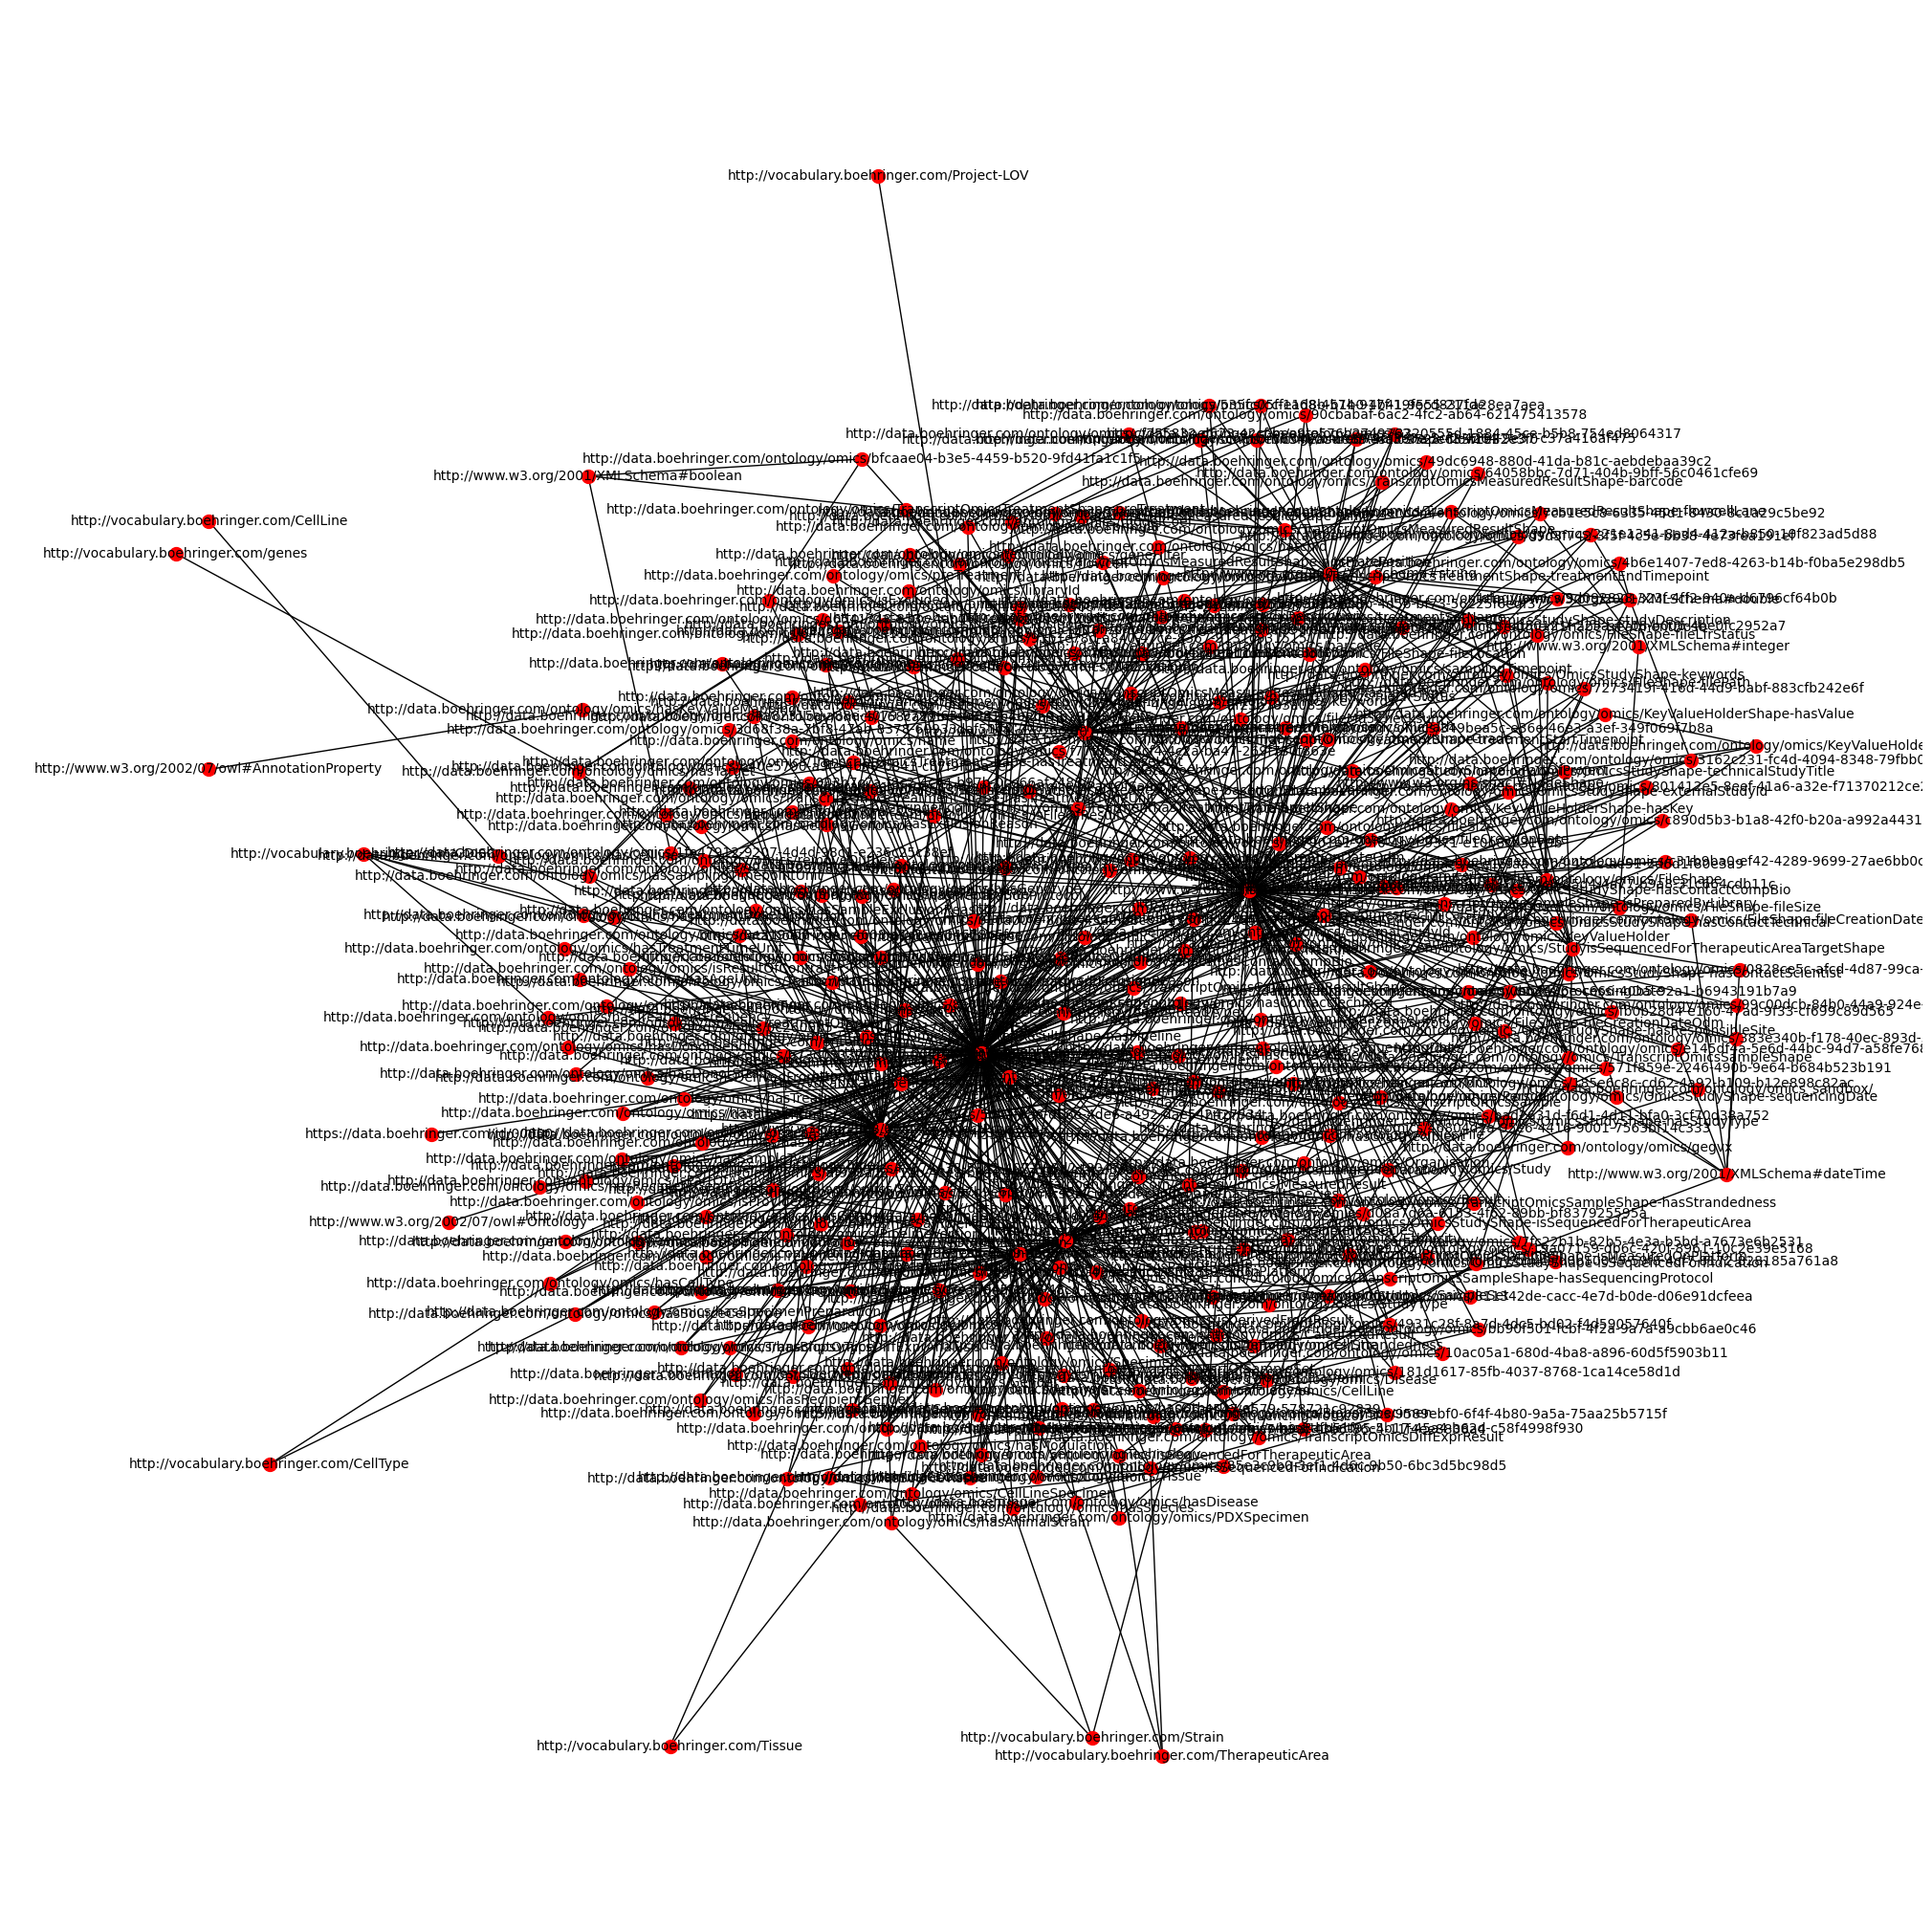

In [6]:
# render a plot of the graph
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
nx.draw(nxg, pos=pos, with_labels=True, node_size=100, node_color="red", font_size=10)
plt.show()
